## Manual CNN 

> The purpose of this was to undertand the mechanism behind tensorflow and understand how the api works in a queue like manner

In [0]:
import numpy as np

In [0]:
class Operation:
  """Input and outputnodes"""
  def __init__(self,input_nodes=[]):
    self.input_nodes = input_nodes
    self.output_nodes = []
    for node in input_nodes:
      print(node)
      self.output_nodes.append(self)
    
    _default_graph.placeholders.append(self)
  
  def __repr__(self):
    return f'{self.input_nodes}'
  def __str__(self):
    return f'Output Nodes: {self.output_nodes}'
  
  def compute(self):
    pass
  

In [0]:
class add(Operation):
  def __init__(self,x,y):
    super().__init__([x,y])
  
  def compute(self,x_var,y_var):
    self.inputs = [x_var,y_var]
    return x_var + y_var
  

In [0]:
class multiply(Operation):
  def __init__(self,x,y):
    super().__init__([x,y])
    self.i = 0
  
  def compute(self,x_var,y_var):
    self.inputs = [x_var,y_var]
    return x_var * y_var
  
  def __repr__(self):
    return f'Multiply Node: {self.inputs}'
  
  def __str__(self):
    self.i += 1
    return f'Multiply: {self.i}'

In [0]:
class matmul(Operation):
  def __init__(self,x,y):
    super().__init__([x,y])
  
  def compute(self,x_var,y_var):
    self.inputs = [x_var,y_var]
    return x_var.dot(y_var) 
  

In [0]:
class Placeholder():
  """Empty Node Representing feature input"""
  def __init__(self):
    self.output_nodes = []
    _default_graph.placeholders.append(self)
  def __repr__(self):
    return 'Placeholder initialized'
    

In [0]:
class Variable():
  """weights"""
  def __init__(self, initial_value=None):
    self.value = initial_value
    self.output_nodes = []
    
    _default_graph.variables.append(self)
  def __repr__(self):
    return f'Variable stored: {self.value}'

In [0]:
class Graph():
  """Controller and connecter"""
  def __init__(self):
    self.operations = []
    self.placeholders = []
    self.variables = []
  def __repr__(self):
    return 'Graph: defaulted'
  def set_as_default(self):
    global _default_graph
    _default_graph = self

In [0]:
 def traverse_postorder(operation):
    nodes_postorder = []
    def recurse(node):
      if isinstance(node, Operation):
        for input_node in node.input_nodes:
          recurse(input_node)
      nodes_postorder.append(node)
    
    recurse(operation)
    return nodes_postorder

In [0]:
class Session:
  def run(self,operation,feed_dict={}):
    nodes_postorder = traverse_postorder(operation)
    
    for node in nodes_postorder:
      if type(node) == Placeholder:
        node.output = feed_dict[node]
      elif type(node) == Variable:
        node.output = node.value
      else:
        node.inputs = [input_node.output for input_node in node.input_nodes]
        node.output = node.compute(*node.inputs)
      
      if type(node.output) == list:
        node.output = np.array(node.output)
    
    return operation.output

In [0]:
g = Graph()
g.set_as_default()

In [0]:
A = Variable([[10,20],[30,40]])

In [0]:
b = Variable([1,1])

In [0]:
x = Placeholder()

In [16]:
y = multiply(A,x)

Variable stored: [[10, 20], [30, 40]]
Placeholder initialized


In [17]:
z = add(y,b)

Multiply: 1
Variable stored: [1, 1]


In [0]:
sess = Session()

In [19]:
sess.run(operation=z,feed_dict={x:10})

array([[101, 201],
       [301, 401]])

## Classification

## Activation Function

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

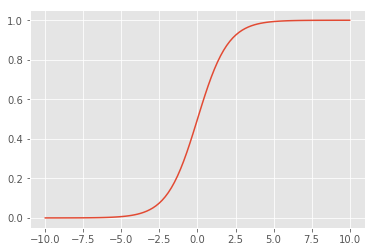

In [25]:
plt.plot(sample_z,sample_a)

In [0]:
class Sigmoid(Operation):
  def __init__(self,z):
    super().__init__([z])
  def compute(self,z_val):
    return 1/(1+np.exp(-z_val))

In [0]:
from sklearn.datasets import make_blobs

In [0]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [0]:
features = data[0]
labels = data[1]

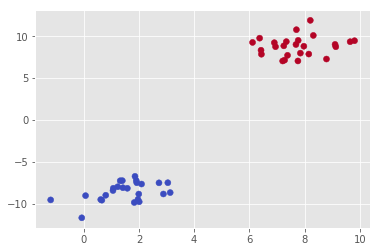

In [178]:
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')

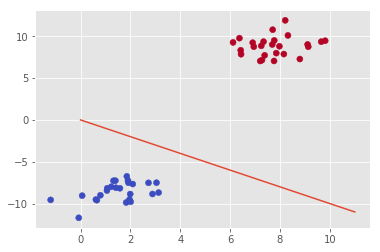

In [180]:
X = np.linspace(0,11,10)
y = -x
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(X,y)

## Solution: Determine a matrix to represent that line^

> via gradient descent


<b>Cost Function</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}


In [0]:
def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [0]:
def gradient_descent(X,y,theta,learning_rate=0.1,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,10))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
   

In [0]:
init_theta = np.random.randn(len(X),1)

In [223]:
def try_g():
  theta, cost_history, theta_history = gradient_descent(
      X=X, y=y,theta=init_theta
  )
  print(f'''Optimal Theta: {theta[0,:]}''')
  return theta

t = try_g()

Optimal Theta: [2.82962438e+146]


In [0]:
import pandas as pd

In [241]:
res_df = (pd.DataFrame(
    [X.reshape(10,),
     y.reshape(10,), 
     t.reshape(10,)]
).transpose())
res_df.columns = ['x','y','theta']
res_df.head(3)

,x,y,theta,pred_y
0,0.000000,-0.000000,2.829624e+146,0.000000e+00
1,1.222222,-1.222222,2.829624e+146,3.458430e+146
2,2.444444,-2.444444,2.829624e+146,6.916860e+146


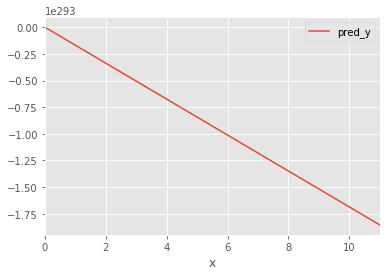

In [227]:
res_df['pred_y'] = res_df['theta']*res_df['x']
res_df.plot(x='x',y='pred_y')

In [0]:
g = Graph()
g.set_as_default()

In [0]:
x = Placeholder()

In [0]:
w = Variable([1,1])

In [0]:
b = Variable(-5)

In [246]:
z = add(matmul(w,x),b)

Variable stored: [1, 1]
Placeholder initialized
Output Nodes: [[Variable stored: [1, 1], Placeholder initialized], [Variable stored: [1, 1], Placeholder initialized]]
Variable stored: -5


In [247]:
a = Sigmoid(z)

Output Nodes: [[[Variable stored: [1, 1], Placeholder initialized], Variable stored: -5], [[Variable stored: [1, 1], Placeholder initialized], Variable stored: -5]]


In [0]:
sess = Session()

In [249]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.999997739675702

In [250]:
sess.run(operation=a,feed_dict={x:[2,-10]})

2.2603242979035746e-06

## Conclusion

> Our tensors live in a list, so the operation time would be much larger in comparison to Tensorflow's hashmap. All in all, we can now understand the threading behind the scenes of tf!